<H1>Analiza dużych zbiorów danych - test zaliczeniowy</H1>
<p>Studia podyplomowe 2021/2022<br>
    Data: 12.06.2022
</p>

<H3>Student:</H3>
<p>Arkadiusz Płoska</p>

<h5>1. Proszę utworzyć przykładowy DataFrame w Spark. Schemat i dane proszę wprowadzić ręcznie. Zbiór powinien zawierać 5 wierszy i 3 kolumny. Co najmniej jedna kolumna powinna być typu String i jedna numeryczna. Nazwy kolumn i wprowadzone wartości mogą być dowolne.</h5>

In [1]:
#importowanie bibliotek i inicjowanie sesji
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('homework').getOrCreate()
from pyspark.sql.types import *

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/12 14:36:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/06/12 14:36:22 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/06/12 14:36:22 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/06/12 14:36:22 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [2]:
data = [
    ['Brzechwa','Bajki',20],
    ['Fredro','Zemsta',100],
    ['Sienkiewicz','Potop',400],
    ['Sienkiewicz','Ogniewm i mieczem',400],
    ['Sienkiewi','Potop',450],
]
schema_fields = [('Author', StringType(), True), ('BookTitle', StringType(), True), ('Pages', IntegerType(), True)]
fields = [StructField(field[0],field[1], field[2]) for field in schema_fields]
schema = StructType(fields)
df = spark.createDataFrame(data, schema)
print(df.printSchema())
print(df.show())

root
 |-- Author: string (nullable = true)
 |-- BookTitle: string (nullable = true)
 |-- Pages: integer (nullable = true)

None


+-----------+-----------------+-----+
|     Author|        BookTitle|Pages|
+-----------+-----------------+-----+
|   Brzechwa|            Bajki|   20|
|     Fredro|           Zemsta|  100|
|Sienkiewicz|            Potop|  400|
|Sienkiewicz|Ogniewm i mieczem|  400|
|  Sienkiewi|            Potop|  450|
+-----------+-----------------+-----+

None


<h5>2. Prosze utworzyć Pandas DataFrame z pliku: "sample_data.csv" zawierającego dane ze stacji meteorologicznej.<br> 
    a) Odnaleźć zmienne wysoko skorelowane i narysować dla nich wykresy modeli regresji liniowej.<br>
    b) Na wykresach umieścić wartość współczynnika korelacji, którego dotyczą.
</h5>

In [3]:
#importowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

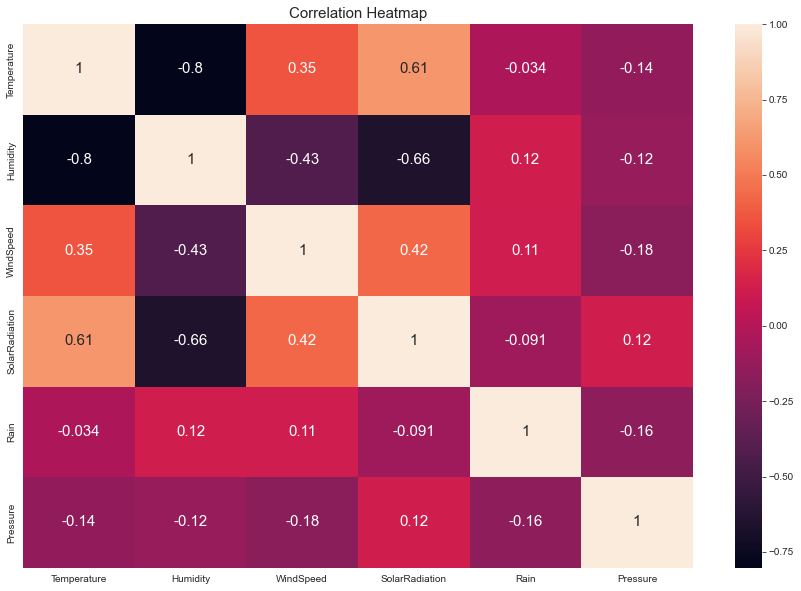

In [4]:
#zaimportowanie pliku, stworzenie dataframe oraz stworzenie heatmapy
df_pd = pd.read_csv('sample_data.csv')
corr = df_pd.corr()
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(corr, annot=True, annot_kws={'size': 15})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15})
plt.show()

In [5]:
corr = df_pd.corr().stack()
corr = corr[(corr.index.get_level_values(0) != corr.index.get_level_values(1))&(abs(corr)>0.7)]
print(f'Wysoko skorelowane cechy: \n{corr}')


Wysoko skorelowane cechy: 
Temperature  Humidity      -0.802544
Humidity     Temperature   -0.802544
dtype: float64


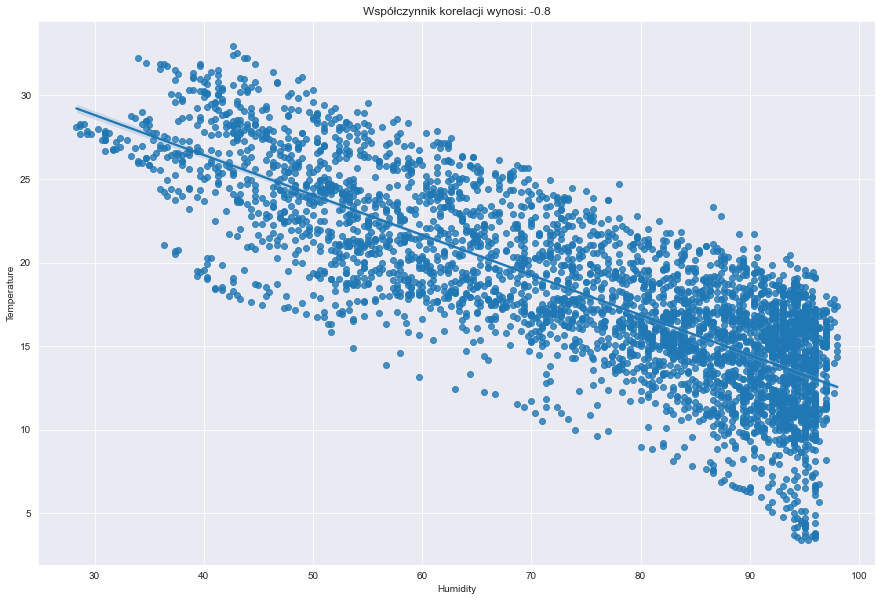

In [6]:
df_pd_highly_correlate = df_pd[['Humidity','Temperature']]

plt.figure(figsize=(15,10))
ax = sns.regplot(data=df_pd_highly_correlate, x='Humidity',y='Temperature')
ax = plt.title(f'Współczynnik korelacji wynosi: {corr[0].round(2)}')

<h5>3. Proszę użyć DataFrame utworzonego z pliku: "sample_data.csv". <br>
    a) Obliczyć średnią dzienną temperaturę (dla każdego dnia w całym zbiorze danych), wynik przedstawić w formie tabelarycznej.<br>
    b) Narysować wykres słupkowy ilustrujący dzienną średnią temperaturę.
</h5>

In [ ]:
#zaladowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
#Wczytanie i transformacja danych
df_pd = pd.read_csv('sample_data.csv', parse_dates=['DateTime'])
df_pd['Day'] = df_pd.DateTime.dt.day
mean_temp_per_day = df_pd.groupby('Day', as_index=False)['Temperature'].mean().round(1)

   Day  Temperature
0    1         15.9
1    2         16.9
2    3         17.5
3    4         16.7
4    5         18.5


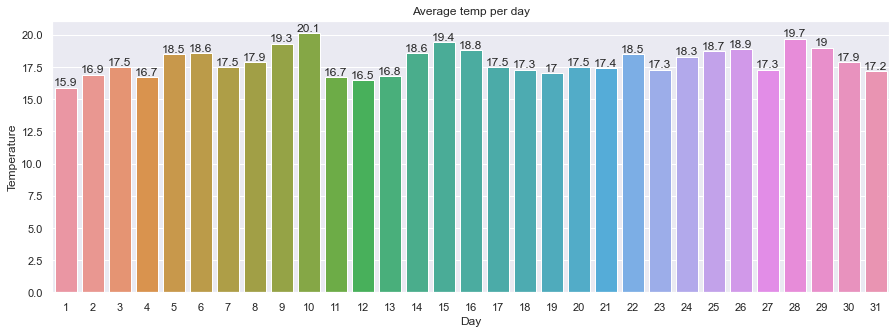

In [46]:
#Wyniki i wizualizacja danych
print(mean_temp_per_day.head())
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
ax = sns.barplot(data=mean_temp_per_day, x='Day', y='Temperature')
ax.bar_label(ax.containers[0])
ax.set_title('Average temp per day')
plt.show();

<h5>4. Wykorzystując DataFrame utworony z pliku: "sample_data.csv", proszę uzyskać informacje:<br>
    a) Jaki był sumaryczny opad w sierpniu? (atrybut "Rain")<br>
    b) Jak wiele deszczowych dni było w sierpniu? (rozróżnić dzień i noc na podstawie wartości "SolarRadiation", nocą przyjmuje ona wartość 0)<br>
    c) Jak wiele deszczowych nocy było w sierpniu?<br>
    d) Krórego dnia sierpnia deszcz padał najdłużej?<br>
</h5>

In [50]:
#zaladowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
#Wczytanie i transformacja danych
df_pd = pd.read_csv('sample_data.csv', parse_dates=['DateTime'])
df_pd['Day'] = df_pd.DateTime.dt.day
df_pd['Month'] = df_pd.DateTime.dt.month

In [148]:
#Odpowiedzi na pytania:
#Jaki był sumaryczny opad w sierpniu? (atrybut "Rain")
Aug_sum = df_pd[df_pd['Month'] == 8]['Rain'].sum()
print(f'Sumaryczny opad w sierpniu: {Aug_sum}')

#Jak wiele deszczowych dni było w sierpniu?
Aug_count_day = df_pd[(df_pd['Month'] == 8)&(df_pd['Rain'] != 0)&(df_pd['SolarRadiation'] != 0)]['Day'].nunique()
print(f'Ilosc dni deszczowych w sierpniu: {Aug_count_day}')

#Jak wiele deszczowych nocy było w sierpniu?
Aug_count_night = df_pd[(df_pd['Month'] == 8)&(df_pd['Rain'] != 0)&(df_pd['SolarRadiation'] == 0)]['Day'].nunique()
print(f'Ilosc nocy deszczowych w sierpniu: {Aug_count_night}')

#Krórego dnia sierpnia deszcz padał najdłużej?
df_day = df_pd[(df_pd['Month'] == 8)&(df_pd['Rain'] != 0)&(df_pd['SolarRadiation'] != 0)]
df_rain_per_month_day = df_day.groupby(['Month','Day'], as_index=False)['Rain'].sum()
day = df_rain_per_month_day[df_rain_per_month_day['Rain']==df_rain_per_month_day.Rain.max()]['Day']
print(f'W sierpniu deszcz padał najdłuzej w dniu: {day.iloc[0]}')

Sumaryczny opad w sierpniu: 69.6
Ilosc dni deszczowych w sierpniu: 11
Ilosc nocy deszczowych w sierpniu: 8
Deszcz padał najdłuzej w dniu: 29


<h5>5. Przyjmijmy, że w ramach badań wykonano pomiar współczynnika CRC (Canopy Reflection Coefficient). Wynik pomiaru został zapisany z częstotliwością 10 dni (jak pokazano w tabeli poniżej). Proszę połączyć dane z tej tabeli z danymi ze stacji meteorologicznej (sample_data.csv) w taki sposób, aby każdemu rekordowi została przypisana odpowiednia wartość współczynnika CRC (zależnie od dekady). Dekady należy ustalić zliczając dni następująco: pierwsza dekada: 1-10 dzień miesiąca, druga dekada: 11-20 dzień miesiąca, trzecia: 21-do ostatniego dnia miesiąca (lub końca danych). W przypadku gdy dla danej dekady brakuje wartości CRC należy przyjąć wartość domyślną CRC=0.23.</h5>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th>Month</th>
      <th>Decade</th>
      <th>CRC</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <th>7</th>
      <td>1</td>
      <td>1.2</td>
    </tr>
    <tr>
      <th>7</th>
      <td>2</td>
      <td>1.1</td>
    </tr>
    <tr>
      <th>7</th>
      <td>3</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
      <td>0.8</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2</td>
      <td>0.6</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3</td>
      <td>0.7</td>
    </tr>

  </tbody>
</table>
Przykładowy wynik powinien wyglądać następująco:<table class="dataframe" border="1">
<thead>
    <tr style="text-align: right;">
        <th></th>
<th>CRC</th>
        <th>DateTime</th>
        <th>Temperature</th>
<th>Humidity</th>
        <th>WindSpeed</th>
        <th>SolarRadiation</th>
<th>Rain</th>
        <th>Pressure</th>
    </tr>
    </thead>
    <tbody>
        <tr>
<th>0</th>
            <td>1.20</td>
            <td>2020-07-07 00:00:00</td>
<td>15.866667</td>
            <td>87.666667</td>
            <td>6.666667</td>
            <td>0</td>
            <td>0.0</td>
<td>1002.400000</td>
        </tr>
        <tr>
            <th>1</th>
            <td>1.20</td>
            <td>2020-07-07 00:30:00</td>
            <td>15.800000</td>
            <td>82.333333</td>
            <td>5.333333</td>
            <td>0</td>
            <td>0.0</td>
            <td>1002.400000</td>
        </tr>
        <tr>
            <th>2</th>
            <td>1.20</td>
<td>2020-07-07 01:00:00</td>
<td>15.066667</td>
<td>82.666667</td>
<td>3.333333</td>
<td>0</td>
<td>0.0</td>
<td>1001.633333</td>
</tr>
<tr>
<th>3</th>
<td>1.20</td>
<td>2020-07-07 01:30:00</td>
<td>15.000000</td>
<td>81.000000</td>
<td>6.000000</td>
<td>0</td>
<td>0.0</td>
<td>1002.133333</td>
</tr>
<tr>
<th>4</th>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
</tr>
</tbody>
</table>

In [240]:
#zaladowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [241]:
#Wczytanie i transformacja danych
df_pd = pd.read_csv('sample_data.csv', parse_dates=['DateTime'])
df_pd['Day'] = df_pd.DateTime.dt.day
df_pd['Month'] = df_pd.DateTime.dt.month

In [249]:
#Stworzenie tabel Month Decade CRC
column_names = ['Month','Decade','CRC']
data = [
    [7,1,1.2],
    [7,2,1.1],
    [7,3,1.0],
    [8,1,0.8],
    [8,2,0.6],
    [8,3,0.7]
]

df_CRC = pd.DataFrame(data, columns=column_names)
df_CRC

,Month,Decade,CRC
0,7,1,1.2
1,7,2,1.1
2,7,3,1.0
3,8,1,0.8
4,8,2,0.6
5,8,3,0.7


In [248]:
#stwrzenie kolumny z df_pd, ktora bedzie uzyta do polaczenia tabel df_pd i df_CRC
conditions = [
    (df_pd['Day'] <= 10),
    (df_pd['Day'] > 10) & (df_pd['Day'] <=20),
    (df_pd['Day'] > 20),
]

values = [1,2,3]

df_pd['Decade'] = np.select(conditions, values)

DateTime          0
Temperature       0
Humidity          0
WindSpeed         0
SolarRadiation    0
Rain              0
Pressure          0
Day               0
Month             0
Decade            0
dtype: int64

In [274]:
final_df = pd.merge(df_pd, df_CRC, how='left', left_on=['Month','Decade'], right_on=['Month','Decade'])
final_df.CRC.fillna(0.23, inplace=True)
final_df = final_df.iloc[:,[10,0,1,2,3,4,5,6]]
final_df

,CRC,DateTime,Temperature,Humidity,WindSpeed,SolarRadiation,Rain,Pressure
0,1.20,2020-07-07 00:00:00,15.866667,87.666667,6.666667,0,0.0,1002.400000
1,1.20,2020-07-07 00:30:00,15.800000,82.333333,5.333333,0,0.0,1002.400000
2,1.20,2020-07-07 01:00:00,15.066667,82.666667,3.333333,0,0.0,1001.633333
3,1.20,2020-07-07 01:30:00,15.000000,81.000000,6.000000,0,0.0,1002.133333
4,1.20,2020-07-07 02:00:00,15.066667,77.666667,8.000000,0,0.0,1002.633333
...,...,...,...,...,...,...,...,...
3956,0.23,2020-09-27 10:00:00,10.933333,94.333333,11.333333,141,0.2,990.433333
3957,0.23,2020-09-27 10:30:00,10.833333,94.000000,11.333333,93,0.4,990.933333
3958,0.23,2020-09-27 11:00:00,10.700000,93.666667,10.000000,131,0.4,991.266667
3959,0.23,2020-09-27 11:30:00,10.633333,93.333333,14.000000,199,0.8,991.500000
